# Week X - Basics of Machine Learning - Part 2

<hr style="border:2px solid gray">

# Index: <a id='index'></a>
1. [Basics of Classification](#classification_basics)
1. [The MNIST Dataset](#MNIST)
1. [Confusion Matrix](#confusion)
1. [The ROC Curve](#ROC)

<hr style="border:2px solid gray">

# Basics of Classification [^](#index) <a name="classification_basics"></a> 

### Introduction to Classification

 In **classification** ML models, the model will make a prediction about how to **categorise a datapoint**. 
 
 
 We will start by looking at one of the most famous datasets in ML, a dataset that describes three different sorts of iris flowers (more information about this dataset can be found on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)). This dataset is so famous that it is built into sklearn, and we can simply import it into to our notebook. 
 
Each data instance has four features; sepal length, sepal width, petal length and petal width. The target/output is an integer from 0 to 2 corresponding to the three different forms of iris. One drawback of the iris dataset is that it is not very large; it only contains 150 instances.

In [7]:
import numpy as np
import scipy as sp 
import pandas as pd
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
print(type(iris))
display(df) #Outputs iris in a nice format

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
print(iris.keys()) #.keys() return the keys of the dictionary as a list

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(iris['DESCR']) #Description of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Building the Model

We will start by building a very simple classification model. In the previous notebook, we discussed the KNN algorithm for both regression and clasification, however we only used the model for a regression example. We can now try to use it for classification.

In [9]:
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing portions
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)  

In [10]:
print(y_train) #Sanity check that all is well (the outputs are between 0 to 2)

[2 2 1 1 0 1 0 2 2 1 2 2 2 2 0 2 0 1 0 1 0 1 2 0 0 1 1 1 2 0 2 0 2 0 2 1 1
 0 2 1 2 0 1 1 2 1 0 1 1 0 1 1 0 2 2 0 0 1 0 0 1 1 0 0 0 1 0 2 0 1 2 2 0 2
 1 2 2 2 2 1 2 0 2 0 2 2 1 1 2 0 1 0 0 1 1 0 1 0 0 2 2 0 2 2 2 1 1 0 2 1 0
 1 0 1 0 2 1 0 2 0]


It is always important to visualise your data, to look for obvious distinguishing traits (discriminators) or strong correlations. A pandas scatter matrix is a good way to achieve this. 

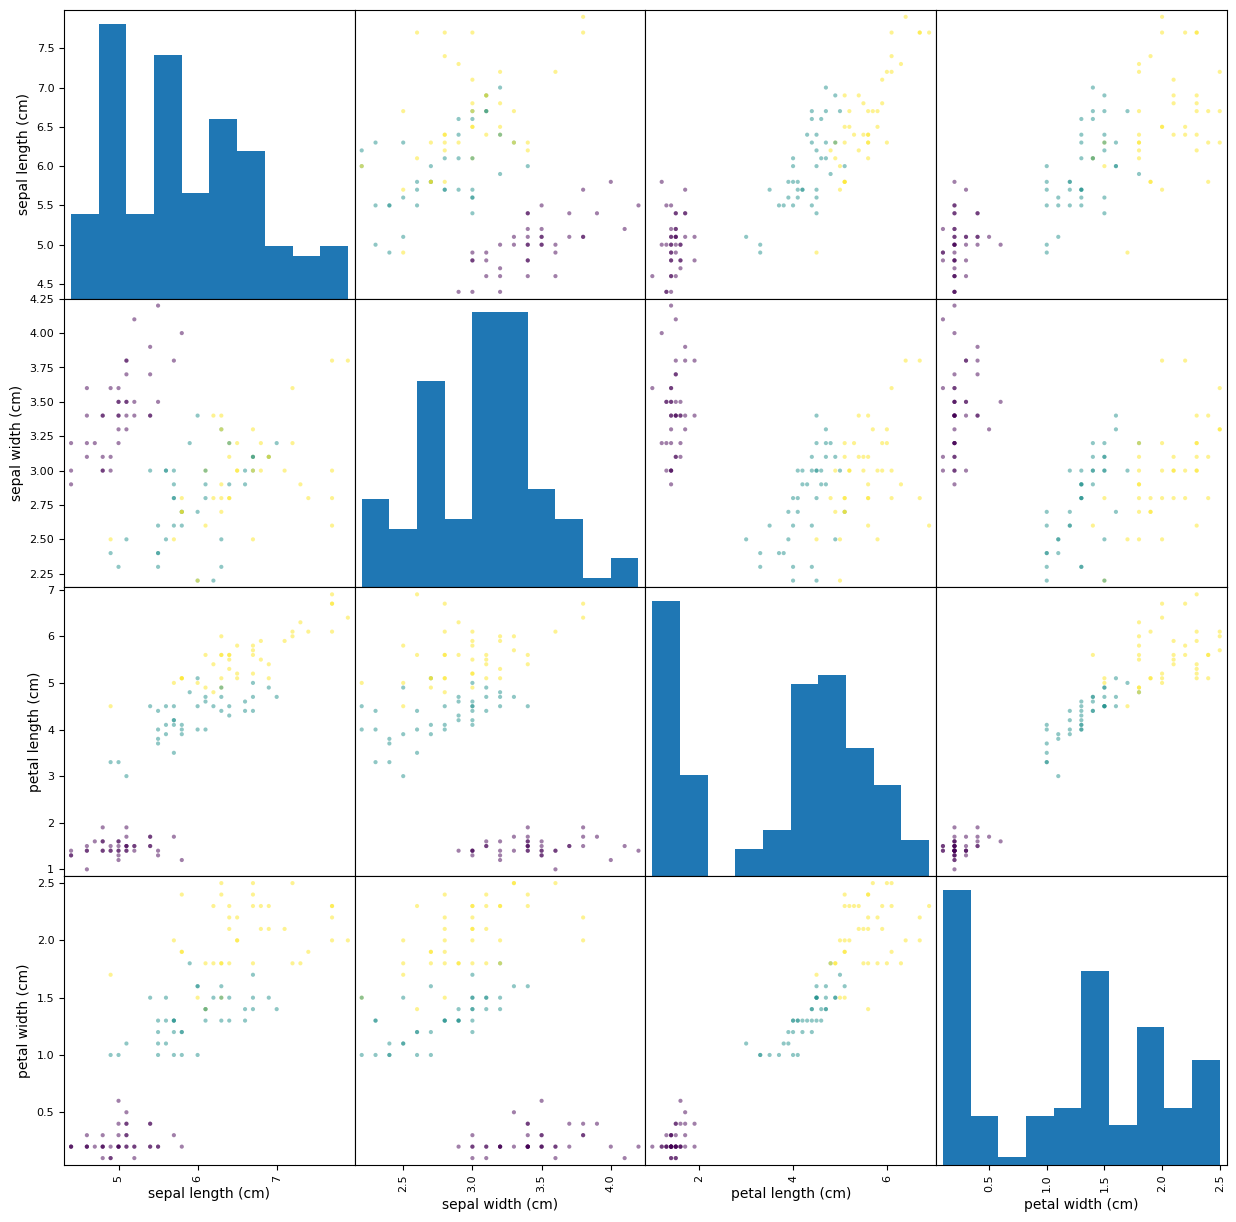

In [11]:
import pandas as pd

df_iris = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(df_iris, figsize=(15, 15), c=y_train);

### Training the Model

The plots in the scatter matrix suggest it may be possible to seperate the data. We will now call SKLearn's KNN classifier function and train our model.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 12 #Here we decided to look at the 12 nearest neighbours to classify something
weights = "uniform"
#weights = "distance"
iris_knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)

In [14]:
iris_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

### Making Predictions

We can now compare the accuracy of our model using the test dataset

In [15]:
pred = iris_knn.predict(X_test)

In [17]:
agree = 0
disagree = 0

for i in range(len(pred)): 
    # If the prediction matches the outcome, add one to the agree count
    if pred[i] == y_test[i]: 
        agree = agree +1
        
    else:
        disagree = disagree +1

print("Agreeing ", agree)
print("Disagreeing ", disagree)
print("Success fraction", agree/(agree+disagree))

Agreeing  29
Disagreeing  1
Success fraction 0.9666666666666667


<div style="background-color: #C2F5DD">

### Exercise

Investigate how different hyperparameters (such as number of neighbours, weighting etc) affect the performance of the kNN classifier. Present the information graphically.

### Binary Classifiers

For the rest of this notebook, we will focus on **binary classifiers** - classifiers that sort instances as either belonging to group X or not. These types of classifiers have historically been the most important, and can make key concepts easier to understand. 

If we wanted to seperate our data into more than two categories, we could use binary classification to split each of the two binary groups into further subgroups, repeating this process until the number of desired groups is achieved.

<hr style="border:2px solid gray">
<a name="section-2"></a>

# The MNIST Dataset [^](#index) <a name="MNIST"></a>

The MNIST dataset is probably the most famous dataset in machine learning (see [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database) for more information), and can be used to teach ML models how to read handwritten number. It contains 70,000 of images of handwritten numbers, with each image labelled with the actual number. The numbers are drawn on a 28 x 28 pixel grid.

In this section, we will attempt to train our own number classifier. First we must read in the data:

_Note: This dataset is contains far more information than the iris dataset and thus will be read in slower._




In [18]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [19]:
feature_count = 28 * 28 # these are 28 x 28 pixel images, so we should have this many features
print (feature_count)

784


In [54]:
X, y = mnist["data"], mnist["target"]
X.shape

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
y.shape

(70000,)

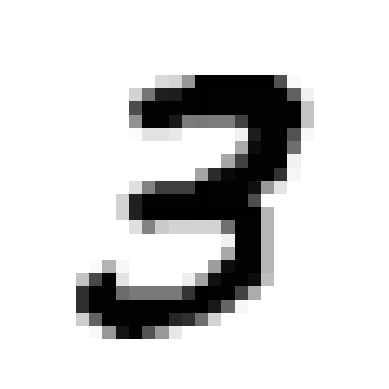

3


In [27]:
some_digit = X[7] #Just to pick an arbitrary figure. Try a different one
some_digit_image = some_digit.reshape(28, 28) #Reshapes the pixels into 28x28 format
plt.imshow(some_digit_image, cmap=mpl.cm.binary) #cmap is the colour map which spans between 0-100 
plt.axis("off")

plt.show()

print (y[7]) #Checking the label 

In [24]:
y = y.astype(np.uint8) #Just setting the file type as unsigned integers for later

We will now write a couple of functions to help display the images.<br><br>


<div style="background-color: #FFF8C6">
    
 Below, we define the kwarg `interpolation`. This is because we are resizing the images when we display them (so they are much larger than the original 28 x 28). However, we must fill in the information for any extra pixels by the transformation. More information and examples can be found [here](https://www.cambridgeincolour.com/tutorials/image-interpolation.htm) . `nearest` creates the information for these extra pixels by averaging the values of the pixels around it.

In [41]:
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")     
    ax.axis("off")

In [51]:
def plot_digits(instances, images_per_row=10):
    
    num_inst = len(instances)
    
    # The ceiling function is similar to the floor function 
    # except that it rounds up to an integer rather than down
    n_rows = int(np.ceil(num_inst/images_per_row))
    
    plt.figure(figsize=(9, 9))
    plt.axis("off")
    
    for num, digit in enumerate(instances):
        
        ax = plt.subplot(n_rows , images_per_row, num+1)
        plot_digit(digit, ax)      

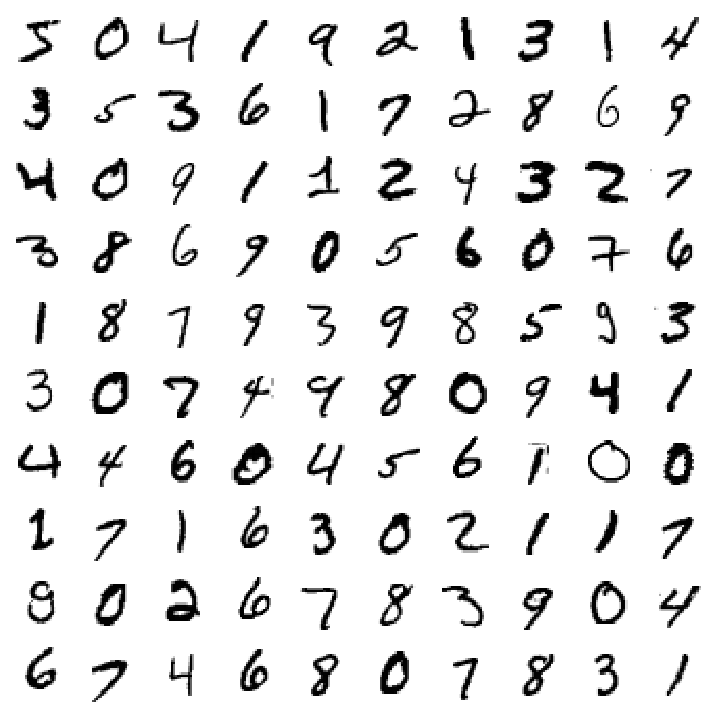

In [52]:
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

### Binary Classifier

Although our data contains 10 obvious categories (the digits 0-9), we can redefine our problem to be one of **binary** classification by simply having two groups - **group 5** and **not group 5** (or any other integer). We must create new labels for our dataset that separates the instances by these two groups:



In [42]:
y_train_5 = (y_train == 5) #True if it was 5, otherwise false
y_test_5 = (y_test == 5)

In [43]:
print(y_test_5) 

[False False False ... False  True False]


There are many binary classifiers that you could use here (and you will learn about two very common ones next week). However **{homl}** uses a different one called **Stochastic Gradient Descent (SGD)**. This is typically good for very large datasets, so we will use this one.

In [44]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 

#max_iter is the number of passes/epochs over the training data
#tol is the stopping criterion. Convergence or tolerance for error for consecutive epochs
#random_state Shuffles data, where you pass an integer for repoducible results

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [45]:
print(sgd_clf.predict([some_digit])) #Remember we set this to X[7] earlier (which was 3)
print(sgd_clf.predict([X[0]])) #However X[0] was 5

[False]
[ True]


### Performance:

We need to work out how well this performs and there are a number of ways of doing this. We could have a look at the test set, but lets keep that "clean" so that we can use it for final evaluation at the end.

First lets try Cross Validation. Here we take $N$-folds from the training set, use all but one fold as training and the remaining one as testing, cycling around until this has happened $N$ times.

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #This has 3 folds

array([0.95035, 0.96035, 0.9604 ])

Wow! More than 95%! However, not so fast. Only roughly 1 in 10 are 5 so even if you had a classifier saying that everything was not true it would be $\approx$ 90% accurate.

<hr style="border:2px solid gray">
<a name="section-3"></a>

## Section Three: Confusion Matrix [^](#outline)

A much more insightful way of looking at this would be to look at how often a 5 was:
* not classified as a 5 (**false negative, FN**),
* was correctly identified (**true positive - TP**),

or a non-5 was:
* a non-5 as a 5 (**false positive, FP**),
* non-5 was correctly identified (**true negative, TN**).

We are still trying to keep our actual test data "clean" so lets lets use cross validation again. This time rather than cross_val_score we cross_val_predict.

In [48]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

The top row of this matrix is about the non-5s. It shows that there were 53892 TN and 687 FP. The second row is about actual 5s. It shows that there were 1891 FN (i.e. not idientified as 5) and 3530 TP.

We can fake what a perfect prediction would look like:

In [51]:
y_train_perfect_predictions = y_train_5 #Setting the predictions to the values themselves
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

The confusion matrix gives the information that we need but sometimes it is better expressed as a fraction, where you want to know two things:

1. what fraction of those identified as 5 really are 5. This is called **precision** (sometimes, especially in particle physics, **purity**):

precision=$\dfrac{TP}{TP+FP}$,

2. what fraction of the true 5s did it select? This is called **recall** (sometimes, especially in particle physics, **efficiency**):

recall= $\dfrac{TP}{TP+FN}$.

Sklearn can compute these for you:

In [55]:
from sklearn.metrics import precision_score, recall_score

print(round(precision_score(y_train_5, y_train_pred), 2))

print(round(recall_score(y_train_5, y_train_pred), 2))

0.84
0.65


## Precision vs Recall

Often in your ML environment you will have a choice between recall and precision (or efficiency vs purity).  

This is not completely obvious in this case, but we can look at it. Inside the **SGDClassifier**, it **calculates a score** and depending on whether or not that **score is above (or below) a threhold** it makes a decision. Changing that threshold would change the precision and recall for this classifier. Sklearn doesn't let you alter the threshold directly, but it does give you access to the *decision score*. You can do this by calling decision_function rather than predict.

We can then use these values to make our own threshold:

In [57]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-4988.52407755])

In [59]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


How to we decide where we want the threshold? The first step is to look at the scores. We start by using the cross validation again but this time with the decision function:

In [61]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [62]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

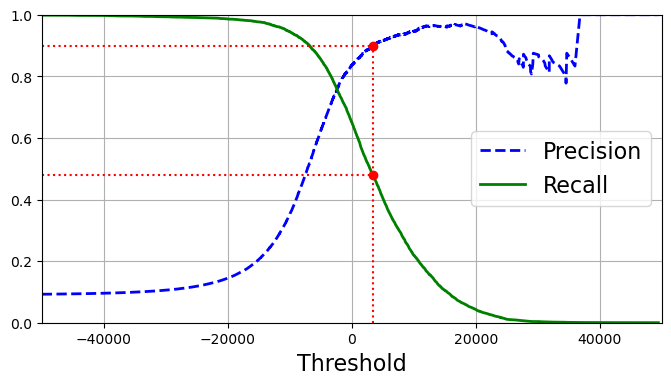

In [63]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [64]:
(y_train_pred == (y_scores > 0)).all()

True

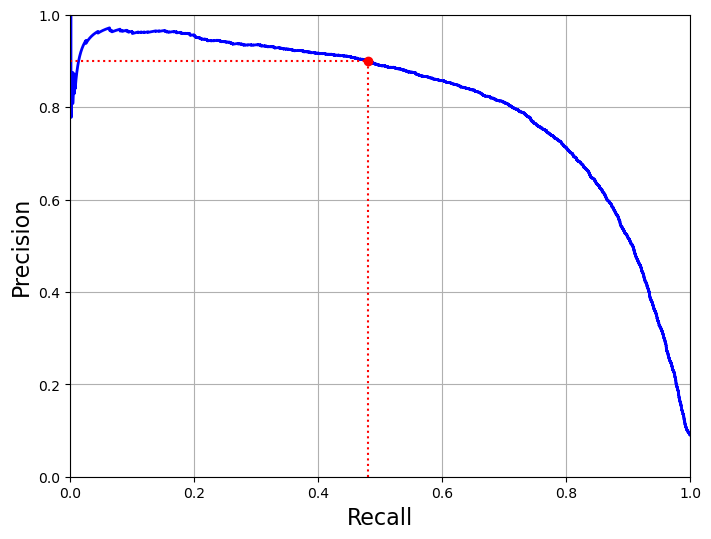

In [65]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

plt.show()

<hr style="border:2px solid gray">
<a name="section-4"></a>

## Section Four: The ROC Curve [^](#outline)

Another very common way of viewing performance is the *Receiver Operating Characteristic*  (ROC) curve. The ROC curve plots the TP vs FP.

In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

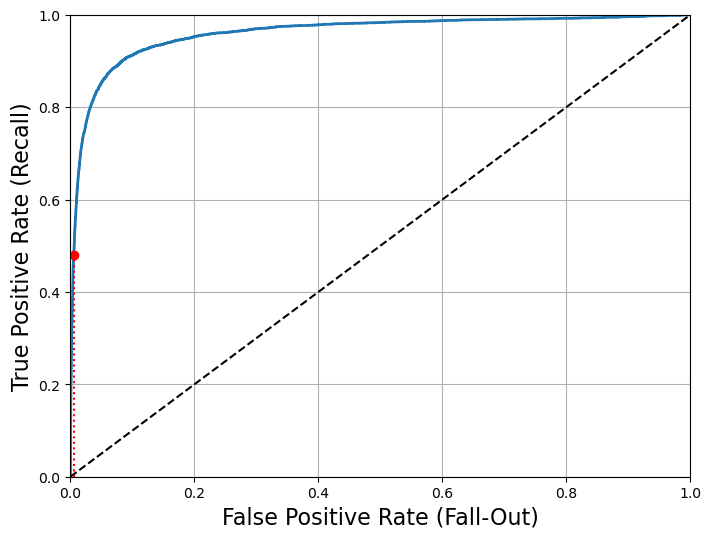

In [75]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line in black
    plt.axis([0, 1, 0, 1])                                    # Not shown
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

Here is an annotated example of an ROC taken from **{homl}**:

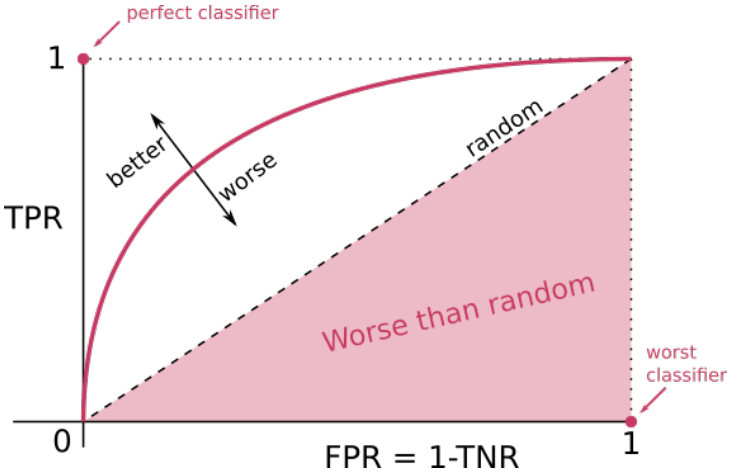

*ROC curve plotting True Positive Rate (TPR) against the false positive rate. s curve is above the diagonal (dashed) line, the model is doing better than a
completely random classifier and vice versa (Source: {homl} 2-4.2).*

One way to compare the performance of different classifiers is to compare the *Area Under ROC Curve* (AUC). The closer this is to 1, the better. Let's see for our classifier.

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

This is close to 1 so this is a successful AUC score.

## Multiclass Classification:

You have seen one multiclass classifier today and you will see two more next week. So for now just an exercise:

<div style="background-color: #C2F5DD">

## Exercise Two:

Use the KNN classifier as a multiclass classifier to identify all the digits in the MNIST to best accuracy that you can on the test data (that we haven't yet used). This will require a lot of parameter setting and computing time. You will need to do a **grid scan** (finds the optimal parameters).

As an example for you to follow lets try the iris optimisation (the MNIST dataset is a lot bigger than iris).

In [69]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.25)

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.957 total time=   0.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.909 total time=   0.0s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.955 total time=   0.0s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.957 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.909 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.955 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=1.000 total time=   0.0s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.957 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [71]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [72]:
grid_search.best_score_

0.9822134387351777

In [73]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315